# Ganglion Cells

## Physiology
Let us pick out a single ganglion cell on the retina, and observe the response of that cell. The area on the retina that influences the response of this cell, and the corresponding visual input, is called the *receptive field* of a ganglion cell. Within this receptive field, some areas excite our cell, and some inhibit it. Typical retinal ganglion cells have a *center-surround* profile:

<img src="https://upload.wikimedia.org/wikipedia/commons/1/16/Receptive_field.png" style="width: 300px;" align="center"/>

For an *on-center cell*, illuminating the immediate surrounding excities the ganglion cell, and illuminating the surrounding area inhibits the cell. Mathematically, we can describe this behavior with a *Difference Of Gaussian (DOG)*-function:

$f(x;\sigma) = \frac{1}{\sigma_1\sqrt{2\pi}} \, \exp \left( -\frac{x^2}{2\sigma_1^2} \right)-\frac{1}{\sigma_2\sqrt{2\pi}} \, \exp \left( -\frac{x^2}{2\sigma_2^2} \right)$

<img src="https://upload.wikimedia.org/wikipedia/commons/9/9b/MexicanHat_Function.png" style="width: 600px;" align="left"/>

The values of $\sigma _{1}$ $\sigma _{2}$ have a ratio of approximately 1:1.6, but vary as a function of eccentricity.

## Filtering an Image
For this example, I show the image that we would see if the size of the receptive field were fixed, and $\sigma_1=1$ pixel and $\sigma_2=2$ pixel: 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.filters import gaussian

In [2]:
# Get the data
inDir = (r'.\data\images')
inFile = 'cat.jpg'
data = plt.imread(os.path.join(inDir,inFile))

# Convert the image to grayscale, and apply a
img = rgb2gray(data)
edges = gaussian(img, 1) - gaussian(img, 2)

For finer control the "convolution" command from *scipy* is probably more suitable.

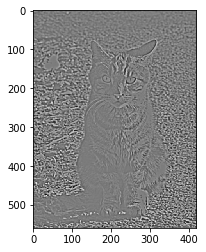

In [3]:
plt.imshow(edges, 'gray')

In [4]:
edges[:3,:3]

array([[-0.03562966, -0.01725626,  0.00316723],
       [-0.00473285,  0.00960758,  0.02461115],
       [ 0.02802601,  0.03808698,  0.04770091]])

We have *positive* and *negative* numbers, implying that positive and negative edges are shown differently. If we want to show *all edges* with a bright color, we have to do that by hand:

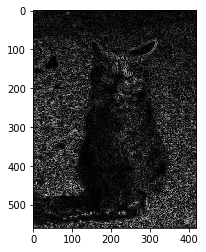

In [5]:
all_edges = np.abs(edges)
plt.imshow(np.uint8(all_edges/np.max(all_edges)*255), 'gray')

In [6]:
import skimage as ski

In [7]:
all_edges[:3,:3]

array([[ 0.03562966,  0.01725626,  0.00316723],
       [ 0.00473285,  0.00960758,  0.02461115],
       [ 0.02802601,  0.03808698,  0.04770091]])

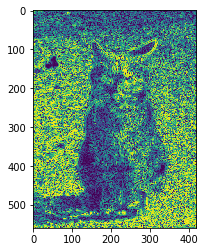

In [8]:
eq = ski.exposure.exposure.equalize_hist(np.abs(all_edges))
plt.imshow(eq)

<img src="data\images\Backward.png" align='left'> [ImgProc_2_Filtering](ImgProc_2_Filtering.ipynb)


    Author: Thomas Haslwanter
    Date: May 13, 2018

<img src="data/images/CCA_40.png">
*Image Processing*  is licensed under a Creative Commons Attribution 4.0 International License.